## Imports & Constants

In [7]:
import highway_env
import gymnasium as gym

import matplotlib.pyplot as plt
from stable_baselines3 import DQN

from IPython.display import clear_output
import time

%matplotlib inline

## Environment & Model

In [8]:
env = gym.make("highway-fast-v0", render_mode="rgb_array")

In [3]:
model = DQN(
    "MlpPolicy",
    env,
    policy_kwargs=dict(net_arch=[256, 256]),
    learning_rate=5e-4,
    buffer_size=15_000,
    learning_starts=200,
    batch_size=32,
    gamma=0.8,
    train_freq=1,
    gradient_steps=1,
    target_update_interval=50,
    verbose=1,
    tensorboard_log="highway_dqn_checkpoints/",
    )

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Training the DQN Agent

In [ ]:
model.learn(2e3, progress_bar=True)
model.save("highway_dqn/model")

## Test our Model

In [9]:
model = DQN.load("highway_dqn/model")

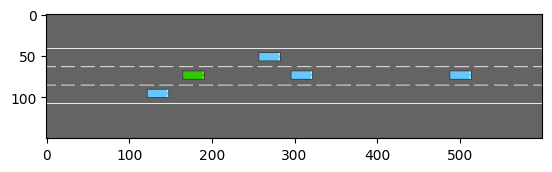

KeyboardInterrupt: 

In [10]:
while True:
    done = truncated = False
    obs, info = env.reset()

    while not (done or truncated):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)

        clear_output(True)
        plt.imshow(env.render())
        plt.show()
        time.sleep(0.2)